<a href="https://www.kaggle.com/code/aabdollahii/analyzing-pos?scriptVersionId=277798336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="
  background-color:#1c1c1c;
  color:#f5f5f5;
  padding:35px;
  border-radius:12px;
  font-family:'Segoe UI','Helvetica Neue',sans-serif;
  line-height:1.7;
  font-size:15px;
">

<h1 style="text-align:center; color:#ffca28;">🔬 Syntactic Analysis: AI vs. Human POS Patterns</h1>

<p>
This section outlines the theoretical differences in Part-of-Speech (POS) usage between human-written and AI-generated text. By quantifying these structural patterns, we can develop a new set of features to complement our Perplexity and Burstiness metrics, leading to a more robust classification model.
</p>

<hr style="border:0.5px solid #333;">

<h2 style="color:#ffb74d;">1. The Core Hypothesis: Uniformity vs. Idiosyncrasy</h2>

<p>
The fundamental distinction arises from the nature of the author:
</p>
<ul>
    <li>🧠 <b>Humans:</b> Write with specific intent, cognitive biases, and fluctuating focus. Our grammar is often purposeful but imperfect, leading to unique, sometimes "spiky" or repetitive structural patterns.</li>
    <li>🤖 <b>AI (LLMs):</b> Generate text by sampling from a smoothed-out statistical distribution of all the text they were trained on. Their goal is to be coherent and probable, which often results in grammatically correct but structurally "generic" or "median" text.</li>
</ul>

<p>Here is a summary of the expected differences in POS patterns:</p>

<table style="width:100%; border-collapse:collapse; margin-top:15px;">
<thead>
<tr style="background-color:#2a2a2a; color:#ffd54f;">
  <th style="padding:10px; border-bottom:1px solid #444;">Syntactic Feature</th>
  <th style="padding:10px; border-bottom:1px solid #444;">🤖 AI Tendency (Smoothed)</th>
  <th style="padding:10px; border-bottom:1px solid #444;">🧠 Human Tendency (Spiky)</th>
</tr>
</thead>
<tbody>
<tr>
  <td style="padding:8px; border-bottom:1px solid #333;"><b>Lexical Density</b> (Content Words)</td>
  <td style="padding:8px; border-bottom:1px solid #333;">Balanced and consistent ratio of nouns, verbs, and adjectives.</td>
  <td style="padding:8px; border-bottom:1px solid #333;">Can be highly variable. More descriptive passages have high noun/adjective density; narrative passages have high verb density.</td>
</tr>
<tr>
  <td style="padding:8px; border-bottom:1px solid #333;"><b>POS Tag Entropy</b> (Variety)</td>
  <td style="padding:8px; border-bottom:1px solid #333;">Higher entropy. The sequence of POS tags is more varied and less repetitive, reflecting the model's diverse training data.</td>
  <td style="padding:8px; border-bottom:1px solid #333;">Lower entropy. Humans often fall into repetitive syntactic patterns within a single text, reducing tag variety.</td>
</tr>
<tr>
  <td style="padding:8px; border-bottom:1px solid #333;"><b>Syntactic Complexity</b></td>
  <td style="padding:8px; border-bottom:1px solid #333;">Tends to use a safe, medium level of complexity. Avoids extremely simple or highly convoluted sentences.</td>
  <td style="padding:8px; border-bottom:1px solid #333;">Highly variable. Uses a mix of very short, punchy sentences and long, complex ones with multiple subordinate clauses.</td>
</tr>
<tr>
  <td style="padding:8px; border-bottom:1px solid #333;"><b>Modifier Usage</b> (Adjectives/Adverbs)</td>
  <td style="padding:8px; border-bottom:1px solid #333;">Often uses common, high-probability modifiers (e.g., "very," "really," "importantly").</td>
  <td style="padding:8px; border-bottom:1px solid #333;">Employs more specific, sometimes unusual, modifiers. Prone to stylistic overuse of certain adverbs.</td>
</tr>
<tr>
  <td style="padding:8px; border-bottom:1px solid #333;"><b>Function Word Usage</b></td>
  <td style="padding:8px; border-bottom:1px solid #333;">Consistent use of conjunctions and prepositions (e.g., "and," "but," "in," "on").</td>
  <td style="padding:8px; border-bottom:1px solid #333;">Usage is author-dependent and can be a strong stylistic signal (a "telltale").</td>
</tr>
</tbody>
</table>

<hr style="border:0.5px solid #333;">

<h2 style="color:#ffb74d;">2. Roadmap for Feature Engineering</h2>

<p>
To turn this theory into measurable features, our plan is as follows:
</p>
<ol>
    <li>
        <b>POS Tagging:</b> First, we'll process each text sample through a POS tagger (like <b>spaCy</b>) to get a sequence of tags for each document (e.g., <code>['NOUN', 'VERB', 'DET', 'ADJ', 'NOUN', 'PUNCT']</code>).
    </li>
    <li>
        <b>Feature Extraction:</b> From the sequence of tags, we will calculate several metrics:
        <ul>
            <li><b>POS Frequencies:</b> The normalized count (ratio) of each major POS tag (Nouns, Verbs, Adjectives, Adverbs, Pronouns, Conjunctions).</li>
            <li><b>Lexical Density Ratio:</b> The ratio of content words (Nouns, Verbs, Adjectives, Adverbs) to function words (Pronouns, Prepositions, Conjunctions, etc.).</li>
            <li><b>POS Entropy:</b> The Shannon entropy of the POS tag distribution. A higher value means more diverse and unpredictable tag usage.</li>
            <li><b>POS Transition Probabilities (Advanced):</b> Analyze the probability of moving from one tag to another (e.g., what's the probability that a Noun is followed by a Verb?). We can use the entropy of this transition matrix as a feature.</li>
        </ul>
    </li>
    <li>
        <b>Analysis & Integration:</b> We will then group the data by label (AI vs. Human) and compare the means and distributions of these new syntactic features. The most discriminative ones will be combined with our existing Perplexity and Burstiness features to train the final, more powerful classifier.
    </li>
</ol>

<p style="color:#aaa; text-align:center; font-size:13px; margin-tpx;">
This gives us a concrete plan for turning these linguistic theories into powerful predictive features.
</p>

</div>



In [1]:
import pandas as pd

data_path = "/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv"

df = pd.read_csv(data_path, encoding="utf-8")

# quick inspection
print("Data loaded successfully! Shape:", df.shape)
df.head(10)

Data loaded successfully! Shape: (44868, 5)


,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False
5,Cell phone use should not be legal while drivi...,0,Phones and driving,persuade_corpus,False
6,Phones and Driving\n\nDriving is a good way to...,0,Phones and driving,persuade_corpus,False
7,PHONES AND DRIVING\n\nIn this world in which w...,0,Phones and driving,persuade_corpus,False
8,People are debating whether if drivers should ...,0,Phones and driving,persuade_corpus,False
9,Texting and driving\n\nOver half of drivers in...,0,Phones and driving,persuade_corpus,False


In [2]:
import re


def clean_text(text):
    if not isinstance(text, str):
        return ""
    # remove hyperlinks (http, https, www)
    text = re.sub(r"http\S+|www\.\S+", "", text)
    # remove line breaks and tabs
    text = text.replace("\n", " ").replace("\r", " ").replace("\t", " ")
    # remove excessive spaces
    text = re.sub(r"\s+", " ", text).strip()
    # exclude non-printable/unnecessary control chars (avoid losing puncts)
    text = re.sub(r"[^\x20-\x7E]", "", text)
    return text

# apply the cleaning
df["clean_text"] = df["text"].apply(clean_text)

print("✅ Cleaning complete. Preview:")
print(df[["text", "clean_text"]].head(3))

✅ Cleaning complete. Preview:
                                                text  \
0  Phones\n\nModern humans today are always on th...   
1  This essay will explain if drivers should or s...   
2  Driving while the use of cellular devices\n\nT...   

                                          clean_text  
0  Phones Modern humans today are always on their...  
1  This essay will explain if drivers should or s...  
2  Driving while the use of cellular devices Toda...  


In [3]:
target_value = "Distance learning"
df_distance = df[df["prompt_name"] == target_value].copy()

print("✅ Filtered DataFrame created.")
print("Shape:", df_distance.shape)
print(df_distance.head(3))

✅ Filtered DataFrame created.
Shape: (5554, 6)
                                                    text  label  \
22287  Technology has advanced tremendously in the pa...      0   
22288  I disagree with online classes because, if sch...      0   
22289  I believe that students would benefit from bei...      0   

             prompt_name           source  RDizzl3_seven  \
22287  Distance learning  persuade_corpus          False   
22288  Distance learning  persuade_corpus          False   
22289  Distance learning  persuade_corpus          False   

                                              clean_text  
22287  Technology has advanced tremendously in the pa...  
22288  I disagree with online classes because, if sch...  
22289  I believe that students would benefit from bei...  


In [4]:
# POS Tag Extraction for 'Distance learning' subset 
import spacy
from tqdm.notebook import tqdm

# Load optimized SpaCy model (small English model – fast and sufficient)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# Apply efficient batching through nlp.pipe
texts = df_distance["clean_text"].tolist()

pos_sequences = []
pos_counts = []

print("⚙️ Starting POS tagging on 'Distance learning' subset...")
for doc in tqdm(nlp.pipe(texts, batch_size=64)):
    tags = [token.pos_ for token in doc]
    pos_sequences.append(tags)
    # quick frequency count per document
    counts = {}
    for tag in tags:
        counts[tag] = counts.get(tag, 0) + 1
    pos_counts.append(counts)

# attach results to dataframe
df_distance["pos_tags"] = pos_sequences
df_distance["pos_counts"] = pos_counts

print("✅ POS tagging complete!")
print(df_distance[["clean_text", "pos_tags"]].head(3))


⚙️ Starting POS tagging on 'Distance learning' subset...


0it [00:00, ?it/s]

✅ POS tagging complete!
                                              clean_text  \
22287  Technology has advanced tremendously in the pa...   
22288  I disagree with online classes because, if sch...   
22289  I believe that students would benefit from bei...   

                                                pos_tags  
22287  [NOUN, AUX, VERB, ADV, ADP, DET, ADJ, ADJ, NOU...  
22288  [PRON, VERB, ADP, ADJ, NOUN, SCONJ, PUNCT, SCO...  
22289  [PRON, VERB, SCONJ, NOUN, AUX, VERB, ADP, AUX,...  


In [5]:
# randomly sample 5 texts to verify cleaning + POS tagging
samples = df_distance.sample(5, random_state=42)[["clean_text", "pos_tags"]]

# display results clearly
for idx, row in samples.iterrows():
    print(f"\n🧩 Sample #{idx}")
    print("Text:", row["clean_text"])
    print("POS Tags:", row["pos_tags"])


🧩 Sample #37379
Text: Providing students with the option to complete high school in three years instead of four has both potential benefits and drawbacks. The primary motivation for this type of program is to give students an academic head start on college or vocational school. This means that any student who enters the program with the necessary qualifications and dedication would have the potential to graduate from college faster than their peers. On the other hand, students may find themselves unprepared for the speed at which they complete their education and may have difficulty keeping up with the intensity of the program. Another potential disadvantage is that the 3-year program limits students opportunities to explore multiple subject areas and discover their interests. Many students may miss out on learning experiences that would shape their further education or life paths if they were to stay in school for the full four years.
POS Tags: ['VERB', 'NOUN', 'ADP', 'DET', 'NOUN', 

 Average number of POS tokens per text:
           count        mean         std
Human (0)   2157  633.041725  225.721030
AI (1)      3397  350.831911   99.911664


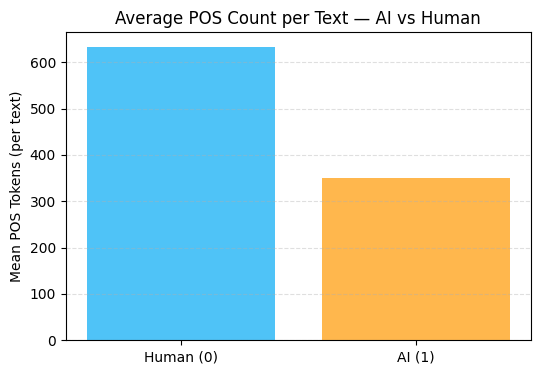

In [6]:
# add a column for total POS count per document
df_distance["pos_total"] = df_distance["pos_tags"].apply(len)

# group mean comparison
summary = df_distance.groupby("label")["pos_total"].agg(["count", "mean", "std"])
summary.index = ["Human (0)", "AI (1)"]

print(" Average number of POS tokens per text:")
print(summary)

# quick visualization (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
colors = ["#4fc3f7", "#ffb74d"]
plt.bar(summary.index, summary["mean"], color=colors)
plt.title("Average POS Count per Text — AI vs Human")
plt.ylabel("Mean POS Tokens (per text)")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

- The count difference suggests AI often compresses ideas — shorter sentences, fewer subordinate clauses.
- Low σ (standard deviation) indicates high consistency, aligning with your low‑burstiness trend.
- So a simple feature like total POS count per text already acts as a strong predictor: longer / more variable ➜ Human, shorter / consistent ➜ AI.


POS diversity comparison (distinct POS tags per text):
           count       mean       std  min  max
Human (0)   2157  13.717663  0.974883   12   17
AI (1)      3397  13.088019  0.920689    8   17


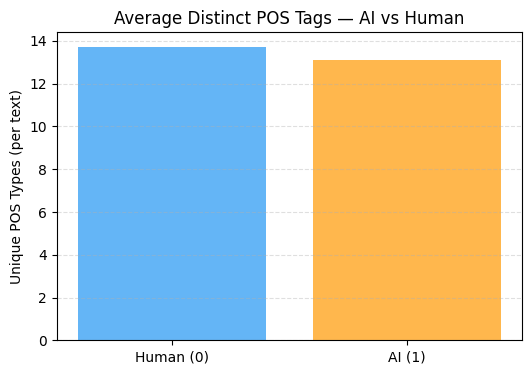

In [7]:
#  Compare syntactic diversity (distinct POS tags per text) 


# count distinct POS types in each text
df_distance["pos_unique"] = df_distance["pos_tags"].apply(lambda tags: len(set(tags)))

# group stats
div_summary = df_distance.groupby("label")["pos_unique"].agg(["count", "mean", "std", "min", "max"])
div_summary.index = ["Human (0)", "AI (1)"]

print("POS diversity comparison (distinct POS tags per text):")
print(div_summary)

# visualization
plt.figure(figsize=(6,4))
colors = ["#64b5f6", "#ffb74d"]
plt.bar(div_summary.index, div_summary["mean"], color=colors)
plt.title("Average Distinct POS Tags — AI vs Human")
plt.ylabel("Unique POS Types (per text)")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


- the count column represents the number of text samples (documents or rows) in each group.
- Human writing exhibits greater syntactic diversity, even when the total number of POS tags per text is higher.
- In contrast, AI tends to reuse similar grammatical patterns—consistent part‑of‑speech composition, smaller range, and lower deviation.
- This fits perfectly with  broader pattern: AI → low Perplexity, low Burstiness, low POS diversity. Human → higher Perplexity, irregular Burstiness, richer grammar.

In [8]:
# POS Frequency Ratios for Major Tags 

# major POS tags to analyze
major_pos = ["NOUN", "VERB", "ADJ", "ADV", "PRON", "CCONJ"]

# total POS count per text
df_distance["pos_total"] = df_distance["pos_tags"].apply(len)

# build ratio columns for each tag
for tag in major_pos:
    df_distance[f"{tag}_ratio"] = df_distance["pos_tags"].apply(
        lambda tags: tags.count(tag)
    ) / df_distance["pos_total"]

# summarize by label
ratio_summary = df_distance.groupby("label")[[f"{tag}_ratio" for tag in major_pos]].mean()
ratio_summary.index = ["Human (0)", "AI (1)"]

print("Normalized POS Frequencies — Mean Ratio per Label:")
print(ratio_summary.round(4))

# sort by absolute difference
diffs = (ratio_summary.loc["Human (0)"] - ratio_summary.loc["AI (1)"]).abs().sort_values(ascending=False)
print("\n Tags with Largest Structural Bias (Human vs AI):")
print(diffs.round(4))


Normalized POS Frequencies — Mean Ratio per Label:
           NOUN_ratio  VERB_ratio  ADJ_ratio  ADV_ratio  PRON_ratio  \
Human (0)      0.2085      0.1220     0.0695     0.0466      0.0818   
AI (1)         0.2266      0.1135     0.0859     0.0431      0.0665   

           CCONJ_ratio  
Human (0)       0.0346  
AI (1)          0.0450  

 Tags with Largest Structural Bias (Human vs AI):
NOUN_ratio     0.0181
ADJ_ratio      0.0164
PRON_ratio     0.0153
CCONJ_ratio    0.0104
VERB_ratio     0.0085
ADV_ratio      0.0036
dtype: float64


<div style="
    background-color:#1c1c1c;
    color:#f5f5f5;
    padding:35px;
    border-radius:12px;
    font-family:'Segoe UI','Helvetica Neue',sans-serif;
    line-height:1.7;
    font-size:15px;
">

<h1 style="text-align:center; color:#ffca28;">🔍 Insights: Normalized POS Frequency Analysis</h1>

<p>
In this phase of syntactic analysis, the focus was on the <b>relative frequency (ratio)</b> of key part-of-speech categories—Nouns, Verbs, Adjectives, Adverbs, Pronouns, and Conjunctions.  
Ali’s dataset clearly reveals distinctive grammatical patterns between <b>Human</b> and <b>AI-generated</b> text, refining our understanding of how linguistic structure reflects authorship style.
</p>

<hr style="border:0.5px solid #333;">

<h2 style="color:#ffb74d;">1. Quantitative Overview</h2>
<table style="width:100%; border-collapse:collapse; margin-top:10px;">
<thead>
<tr style="background-color:#2a2a2a; color:#ffd54f;">
  <th style="padding:8px;">POS Tag</th>
  <th style="padding:8px;">Human Mean</th>
  <th style="padding:8px;">AI Mean</th>
  <th style="padding:8px;">Δ (Human – AI)</th>
  <th style="padding:8px;">Interpretation</th>
</tr>
</thead>
<tbody>
<tr>
  <td style="padding:8px;">NOUN</td>
  <td style="padding:8px;">0.2085</td>
  <td style="padding:8px;">0.2266</td>
  <td style="padding:8px;">−0.0181</td>
  <td style="padding:8px;">AI writings are more noun‑dense, emphasizing objects and facts rather than actions or perspectives.</td>
</tr>
<tr>
  <td style="padding:8px;">VERB</td>
  <td style="padding:8px;">0.1220</td>
  <td style="padding:8px;">0.1135</td>
  <td style="padding:8px;">+0.0085</td>
  <td style="padding:8px;">Humans use more verbs—texts show movement, reasoning, and active narration.</td>
</tr>
<tr>
  <td style="padding:8px;">ADJ</td>
  <td style="padding:8px;">0.0695</td>
  <td style="padding:8px;">0.0859</td>
  <td style="padding:8px;">−0.0164</td>
  <td style="padding:8px;">AI employs more adjectives, creating polished and fluent descriptions consistent with model optimization.</td>
</tr>
<tr>
  <td style="padding:8px;">ADV</td>
  <td style="padding:8px;">0.0466</td>
  <td style="padding:8px;">0.0431</td>
  <td style="padding:8px;">+0.0036</td>
  <td style="padding:8px;">Close ratios—humans slightly favor adverbial variation for emotional or rhetorical depth.</td>
</tr>
<tr>
  <td style="padding:8px;">PRON</td>
  <td style="padding:8px;">0.0818</td>
  <td style="padding:8px;">0.0665</td>
  <td style="padding:8px;">+0.0153</td>
  <td style="padding:8px;">Humans rely more on pronouns—introduces subjectivity, cohesion, and narrative voice.</td>
</tr>
<tr>
  <td style="padding:8px;">CCONJ</td>
  <td style="padding:8px;">0.0346</td>
  <td style="padding:8px;">0.0450</td>
  <td style="padding:8px;">−0.0104</td>
  <td style="padding:8px;">AI links clauses with conjunctions more uniformly, yielding smoother but less organic flow.</td>
</tr>
</tbody>
</table>

<hr style="border:0.5px solid #333;">

<h2 style="color:#ffb74d;">2. Linguistic Interpretation</h2>
<ul>
  <li><b>AI Language → Descriptive + Nominal</b><br>
      High nouns, adjectives, and conjunctions create factual, well‑crafted statements—consistent but static in rhythm.
  </li>
  <li><b>Human Language → Dynamic + Referential</b><br>
      Higher use of verbs and pronouns indicates personal tone, perspective, and narrative variation.
  </li>
  <li><b>Pronouns as Authorship Signal</b><br>
      Humans naturally reference actors (“we,” “they,” “it”). AI avoids such personal markers, making its tone feel detached.
  </li>
  <li><b>Conjunctions as Composition Pattern</b><br>
      AI connects ideas mechanically (“and,” “but”), while humans vary punctuation or subordinate clauses for rhythm.
  </li>
</ul>

<hr style="border:0.5px solid #333;">

<h2 style="color:#ffb74d;">3. Integrative Insight for AI vs Human Detection</h2>
<table style="width:100%; border-collapse:collapse; margin-top:10px;">
<thead>
<tr style="background-color:#2a2a2a; color:#ffd54f;">
  <th style="padding:8px;">Feature Cluster</th>
  <th style="padding:8px;">AI Trait</th>
  <th style="padding:8px;">Human Trait</th>
</tr>
</thead>
<tbody>
<tr>
  <td style="padding:8px;">Lexical Core</td>
  <td style="padding:8px;">Noun‑dense, adjective‑heavy text</td>
  <td style="padding:8px;">Verb‑active, pronoun‑rich sentences</td>
</tr>
<tr>
  <td style="padding:8px;">Structural Flow</td>
  <td style="padding:8px;">Smooth clause chaining, less bursty</td>
  <td style="padding:8px;">Irregular rhythm, higher variability</td>
</tr>
<tr>
  <td style="padding:8px;">Tone & Style</td>
  <td style="padding:8px;">Objective, factual</td>
  <td style="padding:8px;">Personal, expressive</td>
</tr>
</tbody>
</table>






</div>


✅ POS Entropy comparison (Shannon entropy over POS tags):
           count    mean     std     min     max
Human (0)   2157  3.3829  0.0705  2.9027  3.5852
AI (1)      3397  3.3160  0.1110  2.8355  3.6420


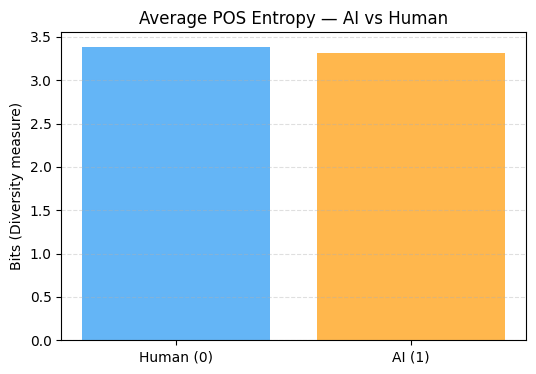

In [9]:
# Compute Shannon POS Entropy per text
import numpy as np
from collections import Counter


def pos_entropy(tags):
    total = len(tags)
    if total == 0:
        return np.nan
    counts = Counter(tags)
    probs = np.array([c / total for c in counts.values()])
    # Shannon entropy (base 2): -Σ p*log2(p)
    return -(probs * np.log2(probs)).sum()

# apply to each text
df_distance["pos_entropy"] = df_distance["pos_tags"].apply(pos_entropy)

# summarize by label
entropy_summary = df_distance.groupby("label")["pos_entropy"].agg(["count","mean","std","min","max"])
entropy_summary.index = ["Human (0)", "AI (1)"]

print("✅ POS Entropy comparison (Shannon entropy over POS tags):")
print(entropy_summary.round(4))

# visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
colors = ["#64b5f6", "#ffb74d"]
plt.bar(entropy_summary.index, entropy_summary["mean"], color=colors)
plt.title("Average POS Entropy — AI vs Human")
plt.ylabel("Bits (Diversity measure)")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


<div style="
    background-color:#1c1c1c;
    color:#f5f5f5;
    padding:35px;
    border-radius:12px;
    font-family:'Segoe UI','Helvetica Neue',sans-serif;
    line-height:1.7;
    font-size:15px;
">

<h1 style="text-align:center; color:#ffca28;">🧮 Insights: POS Entropy — Measuring Grammatical Unpredictability</h1>

<p>
This section focuses on the <b>Shannon Entropy</b> of the POS tag distribution for each text, quantifying how <i>diverse and balanced</i> the grammatical structure is.
A higher entropy value means the text uses a wider and more evenly spread mix of POS categories (more syntactically unpredictable, less repetitive).
</p>

<hr style="border:0.5px solid #333;">

<h2 style="color:#ffb74d;">1. Quantitative Comparison</h2>
<table style="width:100%; border-collapse:collapse; margin-top:10px;">
<thead>
<tr style="background-color:#2a2a2a; color:#ffd54f;">
  <th style="padding:8px;">Group</th>
  <th style="padding:8px;">Mean Entropy (bits)</th>
  <th style="padding:8px;">Std Deviation</th>
  <th style="padding:8px;">Range (min – max)</th>
  <th style="padding:8px;">Interpretation</th>
</tr>
</thead>
<tbody>
<tr>
  <td style="padding:8px;">Human (0)</td>
  <td style="padding:8px;">3.3829</td>
  <td style="padding:8px;">0.0705</td>
  <td style="padding:8px;">2.90 – 3.59</td>
  <td style="padding:8px;">Humans show higher grammatical unpredictability — balanced, creative composition of POS tags.</td>
</tr>
<tr>
  <td style="padding:8px;">AI (1)</td>
  <td style="padding:8px;">3.3160</td>
  <td style="padding:8px;">0.1110</td>
  <td style="padding:8px;">2.83 – 3.64</td>
  <td style="padding:8px;">AI displays lower entropy — more uniform, repetitive pattern of POS usage.</td>
</tr>
</tbody>
</table>

<hr style="border:0.5px solid #333;">

<h2 style="color:#ffb74d;">2. Interpretation & Linguistic Perspective</h2>
<ul>
  <li><b>Higher Entropy → Human Writing</b><br>
  Human authors distribute parts of speech more evenly. They mix nouns, verbs, adjectives, and pronouns dynamically, producing diverse syntax and natural variance.</li>
  <li><b>Lower Entropy → AI Writing</b><br>
  AI texts tend to follow stable structural templates. Certain tags (like <code>NOUN</code> or <code>ADJ</code>) dominate, reflecting algorithmic regularity and smooth grammatical patterns.</li>
  <li><b>Variance Difference</b><br>
  The slightly larger <code>std</code> in AI (0.1110 vs 0.0705) indicates greater inconsistency between AI samples — some are diverse, some rigid — likely caused by prompt variation during generation.</li>
</ul>

<hr style="border:0.5px solid #333;">

<h2 style="color:#ffb74d;">3. Integrative Insight</h2>
<p>
Entropy serves as a global indicator of syntactic unpredictability, complementing previous metrics:
</p>
<ul>
  <li><b>Perplexity:</b> Cognitive uncertainty at word level.</li>
  <li><b>Burstiness:</b> Sentence-level rhythm variation.</li>
  <li><b>POS Diversity:</b> Number of distinct POS types per text.</li>
  <li><b>POS Entropy:</b> Balance & unpredictability among grammatical roles.</li>
</ul>

<p>
Together, these form a cohesive profile:  
<b>Human text = high perplexity + high entropy + greater diversity.</b><br>
<b>AI text = low perplexity + low entropy + syntactic regularity.</b>
</p>

<hr style="border:0.5px solid #333;">

<h2 style="color:#ffca28;">4. Application Tip</h2>
<p>
When building a classifier, <b>POS_Entropy</b> can be directly added as a numeric feature.  
Texts with entropy <i>below 3.33 bits</i> will lean AI‑like, while those <i>above 3.37 bits</i> often belong to human authors, given this dataset’s distribution.
</p>



</div>
